# Medical Cost Analysis Project

Data set definition ??? 
Medical Cost Personal Datasets
 (<a href="https://www.kaggle.com/datasets/mirichoi0218/insurance">Medical Cost Personal Datasets
</a>)

**Group Name: Pytorturers**


## Load Libraries

In [ ]:
#Importing necessary libraries

import pandas as pd
import pandas_profiling
import numpy as np
from numpy import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.linear_model import LinearRegression, Ridge, BayesianRidge
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

## Load Dataset

In [ ]:
!pip install opendatasets

import opendatasets as od

od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Skipping, found downloaded files in "./insurance" (use force=True to force download)


In [ ]:
#Reading csv file into a dataframe called dataset

csv_file =('insurance/insurance.csv')
dataset = pd.read_csv(csv_file)
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

In [ ]:
#Getting an overview of the dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Getting the number of missing values in the dataset

dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Getting the number of each value in each column seperately

for column_name in dataset.columns:
    print ("---- %s ---" % column_name)
    print (dataset[column_name].value_counts())

---- age ---
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
---- sex ---
male      676
female    662
Name: sex, dtype: int64
---- bmi ---
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
---- children ---
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
---- smoker ---
no     1064
yes     274
Name: smoker, dtype: int64
---- region ---
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
---

In [ ]:
#Getting transposed index and columns of the description of the dataset

dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [ ]:
#Finding the pairwise correlation of all columns

correlations = dataset.corr()
correlations

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [ ]:
#Finding the pairwise correlation of charges column

charges_correlations = correlations["charges"]
charges_correlations

age         0.299008
bmi         0.198341
children    0.067998
charges     1.000000
Name: charges, dtype: float64

### Data Visualization

In [ ]:
plt.rcParams['figure.figsize'] = ["10", "6"]

**"bmi" distribution**

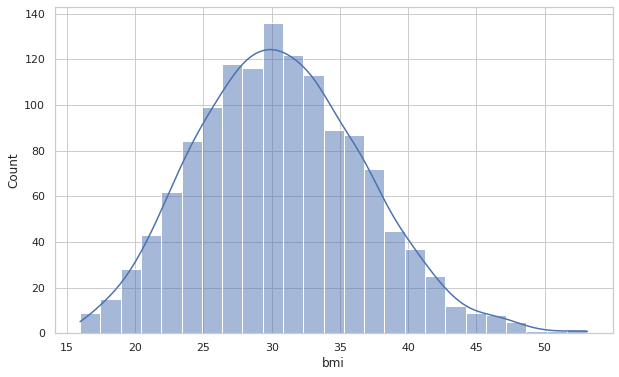

In [ ]:
sns.set(style='whitegrid')
sns.histplot(data=dataset, x="bmi", kde=True)

**Relationship between "smoker" and "charges"**

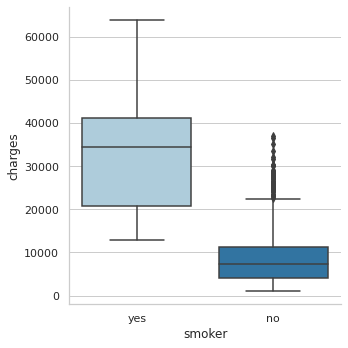

In [ ]:
sns.catplot(x="smoker", y="charges", data=dataset, kind="box", palette="Paired")

**Relationship between "smoker" and "region"**



In [ ]:
dataset.groupby(["smoker","region"]).size().reset_index(name="count")

,smoker,region,count
0,no,northeast,257
1,no,northwest,267
2,no,southeast,273
3,no,southwest,267
4,yes,northeast,67
5,yes,northwest,58
6,yes,southeast,91
7,yes,southwest,58


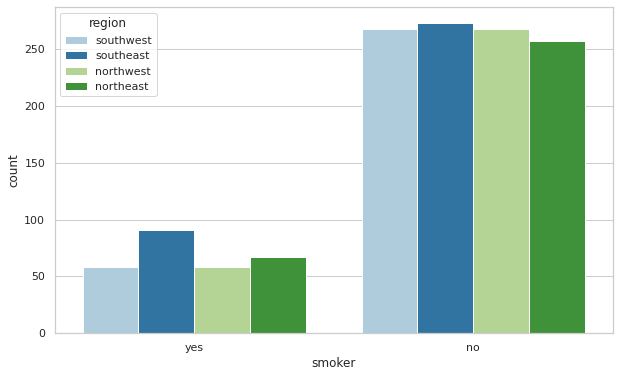

In [ ]:
sns.countplot(x="smoker", hue="region", data=dataset, palette="Paired")

**Relationship between "bmi" and "sex"**

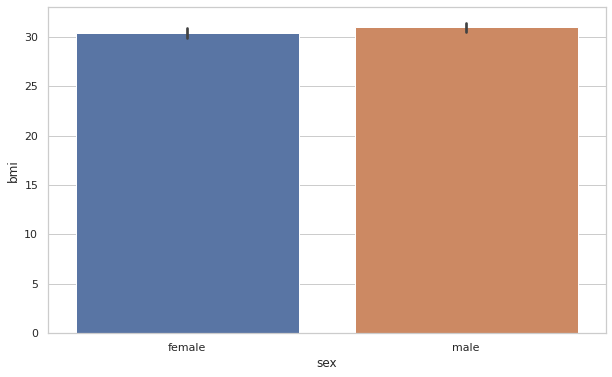

In [ ]:
sns.barplot(x=dataset["sex"], y=dataset["bmi"])

In [ ]:
dataset[["bmi","sex"]].groupby(["sex"], as_index= False).mean().sort_values(by="bmi", ascending=False)

,sex,bmi
1,male,30.943129
0,female,30.377749


Text(0.5, 1.0, 'Distribution of bmi over males')

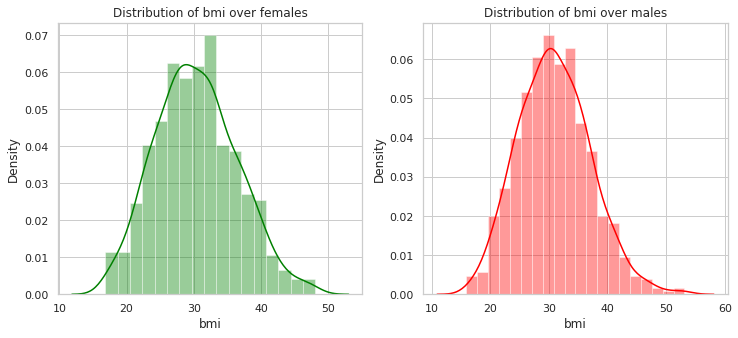

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(dataset[(dataset.sex == 'female')]["bmi"],color='green',ax=ax)
ax.set_title('Distribution of bmi over females')

ax=f.add_subplot(122)
sns.distplot(dataset[(dataset.sex == 'male')]['bmi'],color='red',ax=ax)
ax.set_title('Distribution of bmi over males')

**Finding the region in which the maximum number of children lives**

In [ ]:
#Getting the number of children living in 4 different regions

region_groupby = dataset.groupby(by=["region"])['children'].agg(['count'])
region_groupby

,count
region,
northeast,324
northwest,325
southeast,364
southwest,325


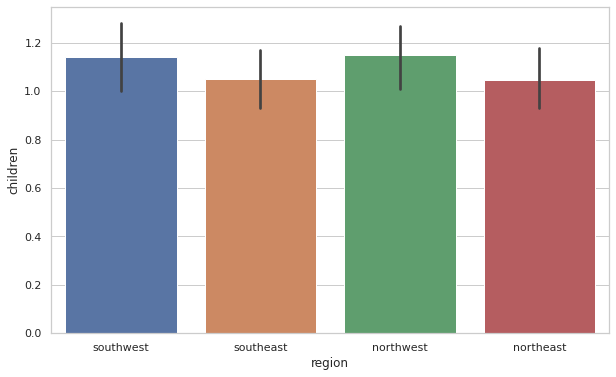

In [ ]:
sns.barplot(x = "region", y = "children", data=dataset)

In [ ]:
res = region_groupby.apply(lambda x: x.sort_values(ascending=False).head(1))
res

,count
region,
southeast,364


**Relationship between "age" and "bmi"**

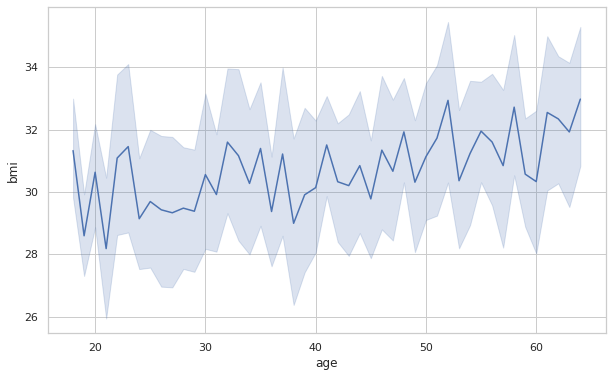

In [ ]:
sns.lineplot(x="age", y="bmi", data=dataset, palette="Paired")

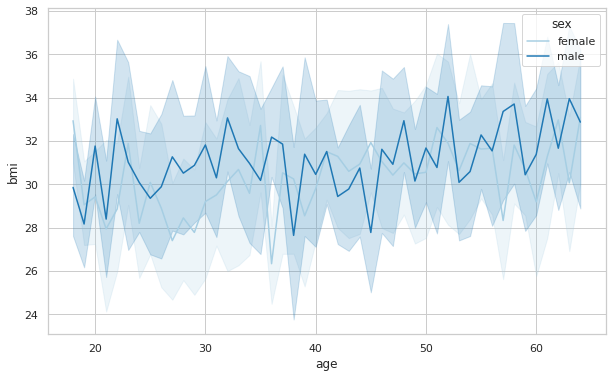

In [ ]:
sns.lineplot(x="age", y="bmi", hue="sex", data=dataset, palette="Paired")

**Relationship between "bmi" and "children"**

In [ ]:
dataset.groupby(["children"])["bmi"].describe()

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


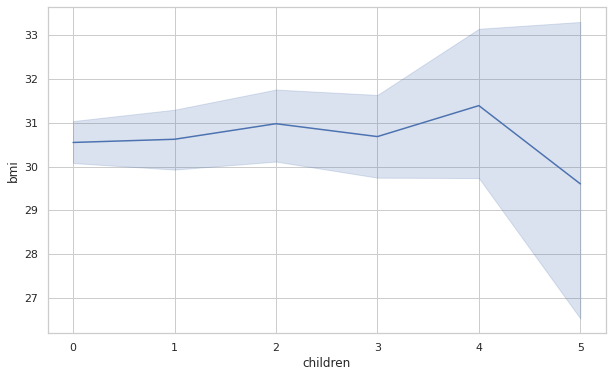

In [ ]:
sns.lineplot(x = "children", y = "bmi", data=dataset, palette="Paired")

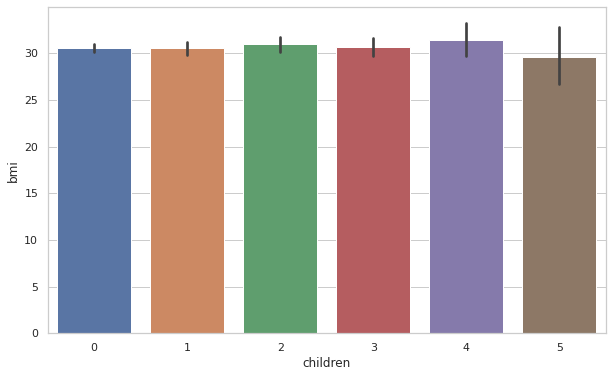

In [ ]:
sns.barplot(x = "children", y = "bmi", data=dataset)

**Relationship between "bmi" and "charges"**

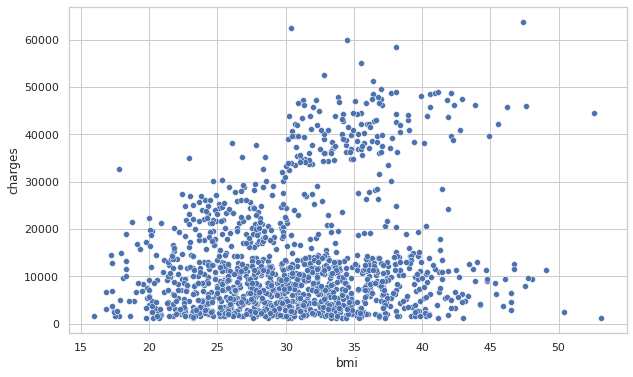

In [ ]:
sns.scatterplot(x = "bmi", y="charges", data=dataset, palette="Paired")

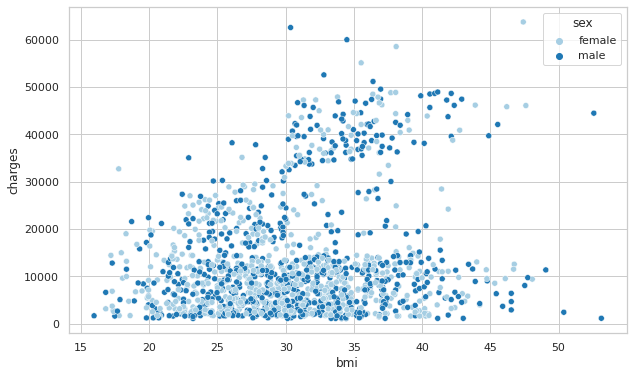

In [ ]:
sns.scatterplot(x = "bmi", y="charges", hue="sex", data=dataset, palette="Paired")

**Relationship between "region", "smoker", and "bmi"**

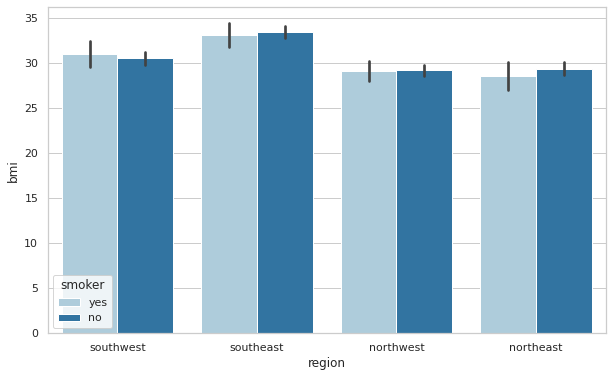

In [ ]:
sns.barplot(x = "region", y = "bmi", hue = "smoker", data=dataset, palette="Paired")

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

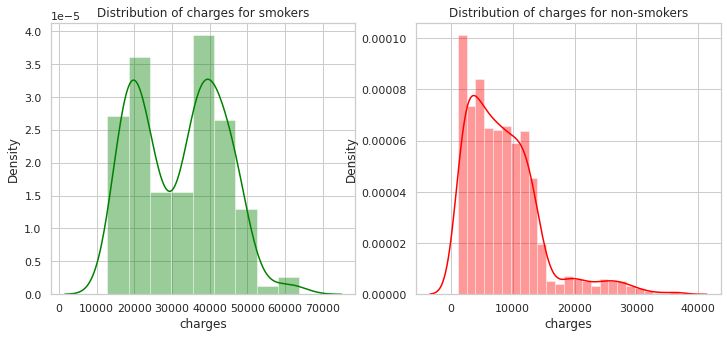

In [ ]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(dataset[(dataset.smoker == 'yes')]["charges"],color='green',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.distplot(dataset[(dataset.smoker == 'no')]['charges'],color='red',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

## Data Preprocessing

### Converting objects labels into categorical

In [ ]:
#Converting sex, smoker and region's type from object to categorical

dataset[['sex', 'smoker', 'region']] = dataset[['sex', 'smoker', 'region']].astype('category')
dataset.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [ ]:
#Encoding region category using one hot encoder

dataset = pd.get_dummies(dataset, columns = ['region'])
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,1


In [ ]:
#Encoding sex and smoker categories using label encoder

le = LabelEncoder()
dataset['sex'] = le.fit_transform(dataset['sex'].values)
dataset['smoker'] = le.fit_transform(dataset['smoker'].values)
dataset

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


### Normalize data

In [ ]:
norm_dataset = dataset.copy()

In [ ]:
#Data normalization and scaling between 0 and 1

norm_dataset[['age', 'bmi', 'children', 'charges']] = minmax_scale(norm_dataset[['age', 'bmi', 'children', 'charges']])
norm_dataset.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0,0.321227,0.0,1,0.251611,0,0,0,1
1,0.000000,1,0.479150,0.2,0,0.009636,0,0,1,0
2,0.217391,1,0.458434,0.6,0,0.053115,0,0,1,0
3,0.326087,1,0.181464,0.0,0,0.333010,0,1,0,0
4,0.304348,1,0.347592,0.0,0,0.043816,0,1,0,0


### Splitting data into training and test data

In [ ]:
train, test = train_test_split(norm_dataset, test_size=0.2, random_state=42)

In [ ]:
X_train = train.drop('charges', axis=1).to_numpy()
y_train = train.loc[:, 'charges'].to_numpy()

In [ ]:
X_test = test.drop('charges', axis=1).to_numpy()
y_test = test.loc[:, 'charges'].to_numpy()

## Modelling


In [ ]:
models = { LinearRegression(): "Linear Regression Model",
           Ridge(alpha=0.05, normalize=True): "Ridge Regression Model",
           HistGradientBoostingRegressor(): "Histogram based Gradient Boosting Model",
           RandomForestRegressor(max_depth=2, random_state=0): "Random Forest Model",
           BayesianRidge(): "Bayesian Ridge Model",
           AdaBoostRegressor(random_state=0, n_estimators=100): "Ada Boost Model",
           SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1): "Support Vector RBF Model",
           SVR(kernel="linear", C=100, gamma="auto"): "Support Vector Linear Model"}

model_names = models.values()

In [ ]:
def models_fit(models, X_train, y_train):
    for model in models.keys():
        model.fit(X_train, y_train)

In [ ]:
models_fit(models, X_train, y_train)

## Prediction

In [ ]:
def models_predict(models, X_test):
    predictions = {}
    for model, model_name in models.items():
        predictions[model_name]= model.predict(X_test)

    return predictions

In [ ]:
all_predictions = models_predict(models, X_test)

## Model Evaluation

In [ ]:
def models_eval(y_true, y_pred):
  mse = mean_squared_error(y_true, y_pred)
  rmse = sqrt(mse)
  mae = mean_absolute_error(y_true, y_pred)
  r2 = 1-r2_score(y_true, y_pred)

  return mse, rmse, mae, r2

In [ ]:
errors = {}
for model_name, predictions in all_predictions.items():
  mse, rmse, mae, r2 = models_eval(y_test, predictions)
  errors[model_name] ={"Mean Squared Error": mse,
                       "R Mean Squared Error": rmse,
                       "Mean Absolute Error": mae,
                       "R Squared Error": r2}

In [ ]:
df_errors = pd.DataFrame(errors)
df_errors

,Linear Regression Model,Ridge Regression Model,Histogram based Gradient Boosting Model,Random Forest Model,Bayesian Ridge Model,Ada Boost Model,Support Vector RBF Model,Support Vector Linear Model
Mean Squared Error,0.008554,0.008726,0.005480,0.006197,0.008565,0.007938,0.010390,0.009317
R Mean Squared Error,0.092487,0.093413,0.074025,0.078723,0.092548,0.089095,0.101929,0.096527
Mean Absolute Error,0.066823,0.068224,0.042134,0.050961,0.066702,0.074671,0.094898,0.076201
R Squared Error,0.216250,0.220603,0.138531,0.156674,0.216537,0.200680,0.262659,0.235555


In [ ]:
df_errors = df_errors.T
df_errors

,Mean Squared Error,R Mean Squared Error,Mean Absolute Error,R Squared Error
Linear Regression Model,0.008554,0.092487,0.066823,0.216250
Ridge Regression Model,0.008726,0.093413,0.068224,0.220603
Histogram based Gradient Boosting Model,0.005480,0.074025,0.042134,0.138531
Random Forest Model,0.006197,0.078723,0.050961,0.156674
Bayesian Ridge Model,0.008565,0.092548,0.066702,0.216537
Ada Boost Model,0.007938,0.089095,0.074671,0.200680
Support Vector RBF Model,0.010390,0.101929,0.094898,0.262659
Support Vector Linear Model,0.009317,0.096527,0.076201,0.235555


In [ ]:
df_errors = df_errors.sort_values('R Squared Error')
df_errors

,Mean Squared Error,R Mean Squared Error,Mean Absolute Error,R Squared Error
Histogram based Gradient Boosting Model,0.005480,0.074025,0.042134,0.138531
Random Forest Model,0.006197,0.078723,0.050961,0.156674
Ada Boost Model,0.007938,0.089095,0.074671,0.200680
Linear Regression Model,0.008554,0.092487,0.066823,0.216250
Bayesian Ridge Model,0.008565,0.092548,0.066702,0.216537
Ridge Regression Model,0.008726,0.093413,0.068224,0.220603
Support Vector Linear Model,0.009317,0.096527,0.076201,0.235555
Support Vector RBF Model,0.010390,0.101929,0.094898,0.262659


In [ ]:
best_model = [model for model in models if models[model]==df_errors.T.columns[0]][0]

In [ ]:
print("Best model is {}".format(models[best_model]))

Best model is Histogram based Gradient Boosting Model


## Hyperparameter optimization

In [ ]:
#Checking model specific parameters

for model, model_name in models.items():
  print(f"{model_name}'s parameters': {model.get_params()}")

Linear Regression Model's parameters': {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}
Ridge Regression Model's parameters': {'alpha': 0.05, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'normalize': True, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.001}
Histogram based Gradient Boosting Model's parameters': {'categorical_features': None, 'early_stopping': 'auto', 'l2_regularization': 0.0, 'learning_rate': 0.1, 'loss': 'squared_error', 'max_bins': 255, 'max_depth': None, 'max_iter': 100, 'max_leaf_nodes': 31, 'min_samples_leaf': 20, 'monotonic_cst': None, 'n_iter_no_change': 10, 'random_state': None, 'scoring': 'loss', 'tol': 1e-07, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}
Random Forest Model's parameters': {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 2, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decre

In [ ]:
def param_variety(model_name):
  if model_name == "Linear Regression Model":
    params = {'fit_intercept':[True,False],
              'normalize':[True,False],
              'copy_X':[True, False]}
            
  elif model_name == "Ridge Regression Model":
    params = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001],
              'fit_intercept': [True, False],
              'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

  elif model_name == "Histogram based Gradient Boosting Model":
    params = {'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              'max_depth': [1, 2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 4]}

  elif model_name == "Random Forest Model":
    params = {'bootstrap': [True, False],
              'max_depth': [5, 10, None],
              'max_features': ['auto', 'log2', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

  elif model_name == "Bayesian Ridge Model":
    params = {'alpha_1': [1, 0.1, 0.01, 0.001, 0.0001],
              'alpha_2': [1, 0.1, 0.01, 0.001, 0.0001],
              'fit_intercept': [True, False],
              'normalize': [True, False]}

  elif model_name == "Ada Boost Model":
    params = {'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
              'n_estimators': [10,50,250,1000],
              'learning_rate': [0.01,0.1]}

  elif model_name == "Support Vector RBF Model" or model_name == "Support Vector Linear Model":
    params = {'C': [0.1,1, 10, 100],
              'gamma': [1,0.1,0.01,0.001,0.0001],
              'epsilon' : [0.01, 0.1, 1],
              'kernel': ['rbf', 'poly', 'sigmoid']}
  
  return params

In [ ]:
def hp_opt(model, X_train, y_train, X_test, y_test):
  params = param_variety(models[model])
  grid_search = GridSearchCV(model, param_grid=params, n_jobs=-1, cv=3)
  grid_search.fit(X_train, y_train)
  accuracy = grid_search.score(X_test, y_test)*100
  print( f"--------------------------------------------------\n"
         f"Model name: {models[model]}\n"
         f"Test accuracy score: {accuracy:.2f}%\n"
         f"Best parameters: {grid_search.best_params_}")
  
  return model

In [ ]:
#Getting the results of the best model

model = hp_opt(best_model, X_train, y_train, X_test, y_test)

--------------------------------------------------
Model name: Histogram based Gradient Boosting Model
Test accuracy score: 88.04%
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4}


In [ ]:
#Checking param_variety function

for each_model in models.keys():
  hp_opt(each_model, X_train, y_train, X_test, y_test)

--------------------------------------------------
Model name: Linear Regression Model
Test accuracy score: 78.36%
Best parameters: {'copy_X': True, 'fit_intercept': False, 'normalize': True}
--------------------------------------------------
Model name: Ridge Regression Model
Test accuracy score: 78.30%
Best parameters: {'alpha': 0.01, 'fit_intercept': True, 'solver': 'sag'}
--------------------------------------------------
Model name: Histogram based Gradient Boosting Model
Test accuracy score: 88.04%
Best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'min_samples_leaf': 4}
--------------------------------------------------
Model name: Random Forest Model
Test accuracy score: 87.92%
Best parameters: {'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 15}
--------------------------------------------------
Model name: Bayesian Ridge Model
Test accuracy score: 78.34%
Best parameters: {'alpha_1': 0.0001, 'alpha

# Saving Model

In [ ]:
#Saving the best model

pickle.dump(model, open("./insurance/HistGradBoostRegressor.dat", "wb"))